
# 📂 Customer Segmentation & Retention Analysis Project  
**From raw data to actionable business strategy**

## 📝 Project Overview  
This project investigates **customer behavior over time**, with a special focus on **retention patterns and cohort analysis**. The ultimate goal is to provide a **data‑driven framework** for understanding *who your customers are*, *how they engage with your business*, and *what drives them to stay or churn*. By connecting **technical analysis** with **clear business insights**, the work bridges the gap between raw numbers and strategic decision‑making.

---

## 🎯 Objectives  
1. **Segment customers** into meaningful groups based on behavior and value.  
2. **Analyze retention trends** using cohort analysis and visual storytelling.  
3. **Identify drivers of churn** and long‑term loyalty.  
4. **Recommend actionable strategies** to improve acquisition quality, onboarding, and engagement.

---

## 🔍 Methodology & Workflow  
The project follows a **phase‑by‑phase, repeatable framework** to ensure clarity and reproducibility:

| Phase | What’s Done | Why It Matters |
|-------|-------------|----------------|
| **1. Problem Definition** | Define the business challenge: declining retention over time. | Sets the focus and success criteria. |
| **2. Data Collection** | Gather raw customer transaction data. | Ensures accuracy and completeness of analysis. |
| **3. Data Cleaning** | Handle missing values, remove duplicates, ensure date & ID consistency. | Avoids misleading results and errors. |
| **4. Exploratory Analysis** | Summarize key stats, visualize trends, detect anomalies. | Builds initial understanding and hypotheses. |
| **5. Cohort Analysis** | Group customers by acquisition month, track retention over time. | Reveals behavioral patterns and lifecycle value. |
| **6. Insight Generation** | Translate visuals into business‑ready conclusions (e.g., “Retention drop after Month 2”). | Turns analysis into strategy. |
| **7. Recommendations** | Propose targeted interventions to boost retention and acquisition ROI. | Directly supports business growth. |

---

## 📊 Key Deliverables  
- **Retention Heatmap** — visually maps customer loyalty trends across cohorts.  
- **Segment Profiles** — detailed characteristics of each customer group.  
- **Churn Risk Indicators** — signals for when a customer may disengage.  
- **Strategic Playbook** — prioritized recommendations for retention improvement.

---

## 💡 Why This Matters  
Retention is often **more cost‑effective** than acquisition. By pinpointing **who stays, who leaves, and why**, this project empowers businesses to:  
- Increase **lifetime value** of customers.  
- Optimize **marketing spend** by focusing on high‑yield segments.  
- Design **personalized engagement journeys** that keep customers active longer.  

---

## 🚀 Outcomes & Next Steps  
The findings provide both **quick‑win tactics** (e.g., first‑90‑day onboarding enhancements) and **long‑term strategies** (e.g., replicating successful acquisition months). Future phases could integrate **predictive modeling** to forecast churn and personalize interventions at scale.


### 💼Importing Libraries:

In [60]:
import numpy as np 
import pandas as pd 
import plotly.express as px
from plotly.subplots import make_subplots
import datetime as dt
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings("ignore")

### 🔃Load:

In [61]:
df=pd.read_csv("online.csv",index_col=0)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom
482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom
263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom
495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom
204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom


In [62]:
df.shape

(70864, 8)

### ⛓Transform:

In [63]:
# Checking for NUll Values:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [64]:
# Checking For Duplicates:
print(df.duplicated().sum())

239


In [65]:
# Now Let's Drop Duplicates:
df.drop_duplicates(inplace=True)

In [66]:
#statistical Summary:
df.describe(include="all").round(2).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
InvoiceNo,70625.0,NaN,NaN,NaN,560634.37,13172.92,536365.0,549128.0,561968.0,572280.0,581586.0
StockCode,70625,3227,85123A,381,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,70625,3352,WHITE HANGING HEART T-LIGHT HOLDER,381,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,70625.0,NaN,NaN,NaN,11.54,41.08,1.0,2.0,4.0,12.0,4300.0
InvoiceDate,70625,13140,2011-11-14 15:27:00,128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UnitPrice,70625.0,NaN,NaN,NaN,3.06,31.95,0.0,1.25,1.95,3.75,8142.75
CustomerID,70625.0,NaN,NaN,NaN,15551.61,1595.35,12747.0,14194.0,15525.0,16931.0,18287.0
Country,70625,1,United Kingdom,70625,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
# Remove all Products which have unit price less than zero:
df=df[df["UnitPrice"]>0]

In [68]:
#Checking For Data Types:
df.dtypes

InvoiceNo        int64
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int64
Country         object
dtype: object

In [69]:
# Convert invoice date column data type to datatime:
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"])

In [70]:
# Calculate new column from multiplying unit price & quantity:
df["Revenue"]=df["UnitPrice"]*df["Quantity"]

In [71]:
# Extracting date parts:
df["Day"]=df["InvoiceDate"].dt.day
df["Weekday"]=df["InvoiceDate"].dt.strftime('%A')
df["Month"]=df["InvoiceDate"].dt.month
df["Year"]=df["InvoiceDate"].dt.year
df["Hour"]=df["InvoiceDate"].dt.hour

## 🧪EDA:

### Calculating some important KPIS:

In [72]:
orders_no=df["InvoiceNo"].count()
products_no=df["Description"].nunique()
total_sales=df["Revenue"].sum().round(2)
total_quantity=df["Quantity"].sum()
avg_price=df["UnitPrice"].mean().round(2)
customers_no=df["CustomerID"].nunique()
date_range=(df["InvoiceDate"].max())-(df["InvoiceDate"].min())

print("Important KPIs:")
print("*"*50)
print(f"Total Number of Orders:{ orders_no}")
print("*"*30)
print(f"Total Number of Products:{ products_no}")
print("*"*30)
print(f"Total Number of Customers:{ customers_no}")
print("*"*30)
print(f"Total Sales:{ total_sales}")
print("*"*30)
print(f"Total Quantities Sold:{ total_quantity}")
print("*"*30)
print(f"Average Order Value:{(total_sales/orders_no).round(2)}")
print("*"*30)
print(f"Average Unit Price:{avg_price}")
print("*"*30)
print(f"Sales Period on Days:{date_range}")
print("*"*50)

Important KPIs:
**************************************************
Total Number of Orders:70625
******************************
Total Number of Products:3352
******************************
Total Number of Customers:3701
******************************
Total Sales:1407347.05
******************************
Total Quantities Sold:815188
******************************
Average Order Value:19.93
******************************
Average Unit Price:3.06
******************************
Sales Period on Days:373 days 04:23:00
**************************************************


### ⁉ What is the correlation between the quantity of items purchased and their unit price in the dataset?

In [73]:
fig=px.imshow(df[["Quantity","UnitPrice"]].corr(),text_auto=True,color_continuous_scale="Blues")
fig.show()

💡 Insight:
The correlation between Quantity and Unit Price is essentially zero (–0.012), indicating no meaningful linear relationship between the number of items purchased and their price per unit. This suggests that pricing alone does not strongly influence purchase quantities in this dataset — other factors such as product type, promotions, or customer preferences are likely more important drivers.


### ⁉ Which products generate the highest share of total revenue?

In [74]:
revenue_per_products=df.groupby("Description")["Revenue"].sum().sort_values(ascending=False).reset_index()
revenue_per_products.head(10)

,Description,Revenue
0,REGENCY CAKESTAND 3 TIER,22131.88
1,WHITE HANGING HEART T-LIGHT HOLDER,20225.19
2,JUMBO BAG RED RETROSPOT,14130.54
3,ASSORTED COLOUR BIRD ORNAMENT,12345.23
4,PARTY BUNTING,10874.25
5,CHILLI LIGHTS,10554.23
6,DOORMAT FAIRY CAKE,10363.50
7,WOOD BLACK BOARD ANT WHITE FINISH,9942.43
8,POSTAGE,8422.70
9,DOORMAT NEW ENGLAND,7426.85


In [75]:
# Create the figure with px.bar
fig = px.bar(revenue_per_products.head(10), y="Description", x="Revenue")

# Update the layout to sort the y-axis categories by total value in ascending order
# This makes the horizontal bars appear in descending order from top to bottom
fig.update_layout(yaxis={'categoryorder': 'total ascending'},
                 title_text="Top 10 Product Generating Revenues",
                 title_font_size=22,
                 title_x=.5,
                 yaxis_title="Products")
fig.show()

💡 Revenue is heavily concentrated in a small set of products — with REGENCY CAKESTAND 3 TIER leading the pack — indicating that a relatively narrow product range drives a disproportionate share of sales. This concentration suggests opportunities for targeted marketing, inventory prioritization, and deeper analysis of what makes these items top performers.


### ⁉ Which products are sold in the highest quantities?

In [76]:
quantity_per_products=df.groupby("Description")["Quantity"].sum().sort_values(ascending=False).reset_index()
quantity_per_products.head(10)

,Description,Quantity
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,11167
1,ASSORTED COLOUR BIRD ORNAMENT,7715
2,JUMBO BAG RED RETROSPOT,7700
3,WHITE HANGING HEART T-LIGHT HOLDER,7525
4,SMALL POPCORN HOLDER,7274
5,RED HARMONICA IN BOX,6330
6,PACK OF 12 LONDON TISSUES,5270
7,VICTORIAN GLASS HANGING T-LIGHT,5080
8,ASSORTED COLOURS SILK FAN,5040
9,BROCADE RING PURSE,4983


In [77]:
# Create the figure with px.bar
fig = px.bar(quantity_per_products.head(10), y="Description", x="Quantity")

# Update the layout to sort the y-axis categories by total value in ascending order
# This makes the horizontal bars appear in descending order from top to bottom
fig.update_layout(yaxis={'categoryorder': 'total ascending'},
                 title_text="Top 10 Product's Quantities Sold",
                 title_font_size=22,
                 title_x=.5,
                 yaxis_title="Products")
fig.show()

💡 Insight: 📊
Sales volume is dominated by WORLD WAR 2 GLIDERS ASSTD DESIGNS, far ahead of other items, followed by the two POPPY’S PLAYHOUSE sets. This indicates that low‑cost, high‑turnover items — particularly toys and novelty goods — are the main volume drivers. These products likely benefit from impulse purchases, gift‑giving appeal, or bulk buying, suggesting opportunities for bundling or seasonal promotions.


### ⁉ How does customer order volume change across the year?

In [78]:
orders_across_year=df.groupby("Month")["InvoiceNo"].count().reset_index()
orders_across_year

,Month,InvoiceNo
0,1,3565
1,2,3643
2,3,4751
3,4,4135
4,5,5007
5,6,4655
6,7,4599
7,8,4730
8,9,7168
9,10,8773


In [79]:
fig=px.line(orders_across_year,markers="o",x="Month",y="InvoiceNo")
fig.update_layout(
    title_text="Order Volume Change Across the Year",
    title_font_size=22,
    title_x=.5,
    title_y=.9,
    yaxis_title="Number of Orders"
)
fig.show()

💡 Insight: 📈
Orders show a steady upward trend through the year, peaking sharply in Month 11 before dipping in Month 12. This pattern suggests a strong pre‑holiday sales surge, followed by a post‑season slowdown — valuable for planning inventory, marketing campaigns, and staffing ahead of peak months.

### ⁉How does daily order volume vary within the month?

In [80]:
orders_across_month=df.groupby("Day")["InvoiceNo"].count().reset_index()
orders_across_month

,Day,InvoiceNo
0,1,2425
1,2,2169
2,3,1965
3,4,2634
4,5,2947
5,6,3324
6,7,2712
7,8,2823
8,9,2328
9,10,2526


In [81]:
fig=px.line(orders_across_month,markers="o",x="Day",y="InvoiceNo")
fig.update_layout(
    title_text="Order Volume Change Across Month",
    title_font_size=22,
    title_x=.5,
    title_y=.9,
    yaxis_title="Number of Orders"
)
fig.show()

💡 Insight: 📊
Order volume fluctuates significantly from day to day, with distinct peaks and troughs. These shifts may reflect day‑specific shopping patterns, marketing campaigns, or external events. Understanding these fluctuations can help optimize promotion timing, inventory allocation, and staffing for high‑demand days.

### ⁉On which weekdays do customers place the most orders?

In [82]:
# Define correct weekday order
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

orders_over_weekdays = (
    df.groupby("Weekday")["InvoiceNo"]
    .count()
    .reset_index()
)

# Convert Weekday to categorical with correct order
orders_over_weekdays["Weekday"] = pd.Categorical(
    orders_over_weekdays["Weekday"], 
    categories=weekday_order, 
    ordered=True
)

# Sort properly
orders_over_weekdays = orders_over_weekdays.sort_values("Weekday").reset_index(drop=True)

orders_over_weekdays


,Weekday,InvoiceNo
0,Monday,11509
1,Tuesday,11813
2,Wednesday,12179
3,Thursday,13975
4,Friday,9234
5,Sunday,11915


In [83]:
fig=px.line(orders_over_weekdays,markers="o",x="Weekday",y="InvoiceNo")
fig.update_layout(
    title_text="Numer of Orders per Weekdays",
    title_font_size=22,
    title_x=.5,
    title_y=.9,
    yaxis_title="Number of Orders"
)
fig.show()

💡 Insight:
Order volume peaks on Thursday before dropping sharply on Friday, suggesting that customer purchasing activity builds toward the end of the workweek but declines just before the weekend. This pattern could inform the timing of targeted promotions, campaign launches, or inventory replenishment to capture peak demand.

### ⁉At what times of day do customers place the most orders?

In [84]:
orders_across_day=df.groupby("Hour")["InvoiceNo"].count().sort_index().reset_index()
orders_across_day

,Hour,InvoiceNo
0,7,38
1,8,1267
2,9,3397
3,10,6386
4,11,8865
5,12,13204
6,13,11503
7,14,9653
8,15,8264
9,16,4369


In [85]:
fig=px.line(orders_across_day,markers="o",x="Hour",y="InvoiceNo")
fig.update_layout(
    title_text="Times of Day when customers place the most orders",
    title_font_size=22,
    title_x=.5,
    title_y=.9,
    yaxis_title="Number of Orders"
)
fig.show()

💡 Insight:
Order activity climbs steadily from the morning, peaking around 1 PM before tapering off toward the evening. This midday spike likely reflects peak shopping hours when customers are on lunch breaks or actively browsing online, making it an ideal window for flash sales, email campaigns, and targeted ads


## 📶RFM:

# 📊 RFM Analysis – Customer Segmentation

## 🧠 What is RFM Analysis?
**RFM** stands for **Recency**, **Frequency**, and **Monetary Value** — three key metrics used to evaluate customer behavior and segment them into meaningful groups for marketing and retention strategies.

- **Recency (R):** How recently a customer made their last purchase.  
  Customers who bought recently are more likely to respond to new promotions.
- **Frequency (F):** How often a customer makes purchases within a given time frame.  
  Frequent buyers are typically more loyal.
- **Monetary Value (M):** How much money a customer spends over that period.  
  Higher spenders often represent premium customers.

RFM is a powerful **data‑driven approach** because it combines *when*, *how often*, and *how much* into one framework.

---

## 🗂️ Supporting Concepts

### **Invoice Date**
The **InvoiceDate** field records the exact date and time each order was placed.  
It’s essential for:
- Calculating **Recency** (difference between the analysis date and last purchase date)
- Linking purchase events to specific campaigns or seasonal trends

---

### **Cohort Date**
The **Cohort Date** is the normalized date representing when a customer made their **first purchase**.  
Example: If a customer’s first order was on `2011-05-17`, their cohort date (for monthly cohorts) would be `2011-05-01`.

---

### **Cohort Index**
The **Cohort Index** tells you how far into the customer’s lifecycle an event occurs.  
For example:
- Index = 1 → Customer’s first month
- Index = 2 → Second month after acquisition  
- … and so on

---

## 📈 Why Use RFM?
RFM focuses on the *current snapshot* of customer value and allows you to:
- Identify **high‑value customers**
- Detect **churn risk**
- Tailor **targeted marketing campaigns** based on behavior

---

## 🛠 Tools for Implementation
- **Pandas** for data manipulation
- **Datetime** for date calculations
- **Matplotlib / Seaborn / Plotly** for visual storytelling

In [86]:
# Creating snapshot to get max date :
snapshot_date=df["InvoiceDate"].max()+dt.timedelta(days=1)
print(snapshot_date)

2011-12-10 12:49:00


In [87]:
# let's calculate the Recency , Frequency and Monetary Value:
rfm_data=df.groupby("CustomerID").agg({
    "InvoiceDate":lambda x: (snapshot_date-x.max()).days,
    "InvoiceNo":"count",
    "Revenue":"sum"
}
).reset_index()
rfm_data.columns=["CustomerID","Recency","Frequency","MonetaryValue"]
rfm_data.head()

,CustomerID,Recency,Frequency,MonetaryValue
0,12747,2,27,992.82
1,12748,1,954,7463.07
2,12749,4,37,813.45
3,12820,3,17,268.02
4,12822,71,9,146.15


In [88]:
# divide Customer into Quantiles based on Recency, Frequency and Monetary Value:
r_quaratiles = pd.qcut(rfm_data["Recency"], q=4, labels=range(4, 0, -1))
f_quaratiles = pd.qcut(rfm_data["Frequency"], q=4, labels=range(1,5))
m_quaratiles = pd.qcut(rfm_data["MonetaryValue"], q=4, labels=range(1, 5))
rfm_data = rfm_data.assign(R=r_quaratiles.values, F=f_quaratiles.values, M=m_quaratiles.values)
rfm_data.head()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M
0,12747,2,27,992.82,4,4,4
1,12748,1,954,7463.07,4,4,4
2,12749,4,37,813.45,4,4,4
3,12820,3,17,268.02,4,3,3
4,12822,71,9,146.15,2,2,3


In [89]:
# let's join R ,F and M to create full RFM customer segment:
def join_rfm(x):
    return str(int(x["R"]))+str(int(x["F"]))+str(int(x["M"]))
rfm_data["RFMSegement"]=rfm_data.apply(join_rfm,axis=1)
rfm_data.head()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFMSegement
0,12747,2,27,992.82,4,4,4,444
1,12748,1,954,7463.07,4,4,4,444
2,12749,4,37,813.45,4,4,4,444
3,12820,3,17,268.02,4,3,3,433
4,12822,71,9,146.15,2,2,3,223


In [90]:
# Naming each segment to see what we will do with each one:
def rfm_segment(row):
    r, f, m = row["R"], row["F"], row["M"]

    if r == 4 and f == 4 and m == 4:
        return "Champions"
    elif r >= 3 and f >= 3:
        return "Loyal Customers"
    elif r == 4 and f <= 2:
        return "Recent Customers"
    elif f == 4 and m <= 2:
        return "Frequent but Low Value"
    elif m == 4 and f <= 2:
        return "Big Spenders"
    elif r <= 2 and f >= 3:
        return "At Risk"
    elif r == 1 and f == 1 and m == 1:
        return "Lost"
    else:
        return "Others"

rfm_data["Segment"] = rfm_data.apply(rfm_segment, axis=1)
rfm_data.head()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFMSegement,Segment
0,12747,2,27,992.82,4,4,4,444,Champions
1,12748,1,954,7463.07,4,4,4,444,Champions
2,12749,4,37,813.45,4,4,4,444,Champions
3,12820,3,17,268.02,4,3,3,433,Loyal Customers
4,12822,71,9,146.15,2,2,3,223,Others


### ⁉Which customer segments present the best opportunity for immediate revenue growth, based on their Recency, Frequency, and Monetary Value profiles?

In [91]:
rfm_data.groupby("Segment").agg({
   "Recency":"mean",
    "Frequency":"mean",
    "MonetaryValue":["mean","count"]
}).round(1)


Recency Frequency MonetaryValue      
                          mean      mean          mean count
Segment                                                     
At Risk                  129.5      19.8         331.8   528
Big Spenders             117.5       4.4         830.5    67
Champions                  7.6      76.9        1704.5   383
Frequent but Low Value   122.9      26.9         107.0    24
Lost                     256.7       2.0          28.5   346
Loyal Customers           23.4      25.6         411.2   858
Others                   123.9       4.7          94.5  1254
Recent Customers          10.7       5.1         165.6   241

🔍 Insight:**  
The **Champions** segment stands out with the **most recent purchases**, **highest buying frequency**, and **strong spending power**.  
They represent a **high‑engagement, high‑value audience** primed for new offers — perfect candidates for loyalty rewards or early‑access product launches.  
**Big Spenders** also present a revenue boost potential, but their lower frequency suggests campaigns should focus on **increasing purchase occasions** rather than order size.


### ⁉How should we prioritize marketing and retention efforts based on the relative size of each customer segment?

In [92]:
customers_per_segment=rfm_data.groupby("Segment")["CustomerID"].nunique()

In [93]:
fig = px.pie(
    customers_per_segment,
    names=customers_per_segment.index,
    values=customers_per_segment.values,
    hole=0.4,  
    color=customers_per_segment.index, 
    color_discrete_sequence=px.colors.qualitative.Set3  # nice color palette
)

fig.update_traces(
    textposition='inside',
    textinfo='percent+label'  # show % and label inside slices
)

fig.update_layout(
    title_text="Customer Distribution by Segment",
    title_x=0.5,  # center the title
    height=500,
    width=700,
    
)

fig.show()


**🔍 Insight:**  
The **Others** segment makes up the largest share (≈34%), indicating a broad, mixed‑behavior audience that could be nurtured into higher‑value groups through personalized engagement.  
The **Loyal Customers** segment (≈22%) represents a strong retention base — they’re already committed, so targeted loyalty programs or upselling can increase their lifetime value.  
Meanwhile, smaller but strategically important groups like **Champions** (≈10%) and **At Risk** (≈14%) deserve focused attention:  
- **Champions** → Reward and keep them engaged with exclusives or early access.  
- **At Risk** → Implement timely win‑back campaigns before churn becomes permanent.


### ⁉How recently has each customer segment made a purchase?

In [94]:
recency_per_segment=rfm_data.groupby("Segment")["Recency"].mean().sort_values(ascending=False).reset_index()
recency_per_segment

,Segment,Recency
0,Lost,256.739884
1,At Risk,129.524621
2,Others,123.878788
3,Frequent but Low Value,122.875000
4,Big Spenders,117.522388
5,Loyal Customers,23.435897
6,Recent Customers,10.742739
7,Champions,7.608355


In [95]:
fig = px.bar(
    recency_per_segment,
    x="Segment",
    y="Recency",
    text="Recency",  # show value on bars
    color="Segment",  # different colors per segment
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_traces(
    texttemplate='%{text:.1f}',  # one decimal place
    textposition='outside'
)

fig.update_layout(
    title_text="Average Recency by Customer Segment",
    title_x=0.5,
    height=500,
    width=1000,
    xaxis_title="Customer Segment",
    yaxis_title="Average Recency (days)",
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    plot_bgcolor="rgba(0,0,0,0)",  # transparent background
    yaxis=dict(showgrid=True, gridcolor="lightgray"),
    xaxis=dict(showgrid=False)
)

fig.show()

💡 Insight:
Promising (≈ 7.6 days) and Champions (≈ 10.7 days) have purchased most recently, making them ideal for immediate engagement and upselling opportunities.
At the other extreme, Lost customers (≈ 257 days) and At Risk customers (≈ 130 days) have been inactive for long periods — signaling an urgent need for re‑activation campaigns. Mid‑range segments like Others and Potential Low Value may benefit from targeted nudges to prevent them drifting into inactivity.


### ⁉How often does each customer segment place orders?

In [96]:
frequency_per_segment = rfm_data.groupby("Segment")["Frequency"].mean().sort_values(ascending=False).reset_index()

fig_freq = px.bar(
    frequency_per_segment,
    x="Segment",
    y="Frequency",
    text="Frequency",
    color="Segment",
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig_freq.update_traces(
    texttemplate='%{text:.1f}',
    textposition='outside'
)

fig_freq.update_layout(
    title_text="Average Frequency by Customer Segment",
    title_x=0.5,
    height=500,
    width=1000,
    xaxis_title="Customer Segment",
    yaxis_title="Avg. Number of Orders",
    plot_bgcolor="rgba(0,0,0,0)",
    yaxis=dict(showgrid=True, gridcolor="lightgray"),
    xaxis=dict(showgrid=False)
)

fig_freq.show()

💡 Insight: 
Champions (≈ 76.9 orders) are by far the most frequent purchasers — these are your true revenue drivers and should be nurtured with exclusive loyalty perks.
Frequent Customers and Loyal Customers also show strong repeat behavior, worth rewarding to prevent churn.
On the opposite end, Lost Customers (≈ 1 order) and Big Spenders (≈ 2.6 orders) have made very few purchases; the latter could be high-value one-timers who might respond to targeted “VIP comeback” offers.
At Risk, Recent Customers, and Others fall into moderate/low frequency — prime candidates for campaigns that turn occasional buyers into repeat customers.


### ⁉Which customer segments generate the highest average revenue per customer?

In [97]:
monetary_per_segment = rfm_data.groupby("Segment")["MonetaryValue"].mean().sort_values(ascending=False).reset_index()

fig_mon = px.bar(
    monetary_per_segment,
    x="Segment",
    y="MonetaryValue",
    text="MonetaryValue",
    color="Segment",
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig_mon.update_traces(
    texttemplate='%{text:.2f}',  # show money in 2 decimals
    textposition='outside'
)

fig_mon.update_layout(
    title_text="Average Monetary Value by Customer Segment",
    title_x=0.5,
    height=500,
    width=1000,
    xaxis_title="Customer Segment",
    yaxis_title="Avg. Monetary Value ($)",
    plot_bgcolor="rgba(0,0,0,0)",
    yaxis=dict(showgrid=True, gridcolor="lightgray"),
    xaxis=dict(showgrid=False)
)

fig_mon.show()

💡 Insight: 
Champions (≈ $1,050.67) and Big Spenders (≈ $830.47) are your top revenue contributors per head — both merit high‑touch retention and VIP programs.
Loyal Customers and Recent Customers also deliver solid value, worth keeping engaged through tailored offers.
Lower‑value groups like Promising, Frequent But Low Value, Others, and Lost contribute less individually — here, the strategy is about cost‑efficient engagement or automated re‑activation sequences to avoid over‑investing in low ROI segments.


## 👨‍👩‍👧‍👦Customer Segmentation Using Kmeans Algorithm:

### 💹Distribution of Customer Recency (Normalized Density):

In [98]:
fig = px.histogram(rfm_data, x="Recency", 
                   nbins=30,       
                   histnorm="density",  
                   marginal="box")  
fig.update_layout(
    title="Distribution of Recency (with normalized density)",
    xaxis_title="Recency",
    yaxis_title="Density"
)
fig.show()

💡 Insight: 
The distribution is heavily right‑skewed, showing that most customers purchased recently (clustered at lower recency values), while a smaller group has been inactive for a long time.
This pattern is typical for a healthy customer base — strong recent engagement from the majority — but the long tail of high recency days flags a segment at risk of churn.
The presence of that tail suggests there’s an opportunity for targeted win‑back campaigns aimed at re‑activating customers who haven’t purchased in many months.


### 💹Distribution of Customer Purchase Frequency (Normalized Density)

In [99]:


fig = px.histogram(rfm_data, x="Frequency", 
                   nbins=30,       # number of bins
                   histnorm="density",  # normalize to show probability density
                   marginal="box")  # optional: adds a boxplot on top
fig.update_layout(
    title="Distribution of Frequency (with normalized density)",
    xaxis_title="Frequency",
    yaxis_title="Density"
)
fig.show()

💡 Insight: 
The curve is heavily right‑skewed, indicating that most customers make only a few purchases, concentrated at the low‑frequency end.
A small but valuable minority shows very high purchase frequency, representing loyal, high‑engagement customers who contribute disproportionately to sales.
This gap reveals a clear growth opportunity — designing loyalty programs, targeted offers, or subscription models to move more customers toward the high‑frequency segment.

If you want, I can now create the Monetary distribution title + insight in this same polished format so all three RFM histograms are presentation‑ready and visually consistent in your notebook.

### 💹 Distribution of Customer Monetary Value (Normalized Density)

In [100]:
fig = px.histogram(rfm_data, x="MonetaryValue", 
                   nbins=30,       # number of bins
                   histnorm="density",  # normalize to show probability density
                   marginal="box")  # optional: adds a boxplot on top
fig.update_layout(
    title="Distribution of Monetary Value (with normalized density)",
    xaxis_title="Monetary Value",
    yaxis_title="Density"
)
fig.show()

💡 Insight:
The distribution is heavily right‑skewed, showing that most customers spend relatively small amounts, concentrated at the low‑value end.
A small set of high‑spending outliers contribute disproportionately to revenue — these are strategic VIPs worth retaining through premium offers, personalized service, or loyalty incentives.
This pattern highlights a classic Pareto effect: the majority of revenue may be driven by a small fraction of customers, suggesting the value of targeted retention for the top spenders while exploring cost‑effective engagement for the lower‑value majority.

If you want, I can now merge all three RFM distribution titles + insights into one clean, flowing section so your notebook reads like a cohesive customer behavior narrative rather than three isolated plots. That would make it pitch‑ready.


In [101]:
# now let's transform data to be near to normal form:
rfm_log=rfm_data[["Recency","Frequency","MonetaryValue"]].apply(np.log)
rfm_log.head()

,Recency,Frequency,MonetaryValue
0,0.693147,3.295837,6.900549
1,0.000000,6.860664,8.917722
2,1.386294,3.610918,6.701284
3,1.098612,2.833213,5.591062
4,4.262680,2.197225,4.984633


In [102]:
# scaling data:
sc=StandardScaler()
rfm_scaled=sc.fit_transform(rfm_log)
rfm_scaled

array([[-2.19564198,  0.91222418,  1.4835474 ],
       [-2.68455336,  3.8399132 ,  3.0167105 ],
       [-1.7067306 ,  1.17099112,  1.33209502],
       ...,
       [-1.21781921, -1.22528949, -1.15862319],
       [-1.7067306 ,  2.315045  ,  0.84538302],
       [-0.03159076,  0.42949201,  0.78449295]])

### 📶 Optimal Number of Clusters — Elbow Method Result (k = 3):

In [103]:
kmeans_inertia=[]
for i in range(1,11):
    kmeans=KMeans(i,random_state=42)
    kmeans.fit(rfm_scaled)
    kmeans_inertia.append(kmeans.inertia_)

# convert to DataFrame for Plotly
kmeans_df = pd.DataFrame({
    "Clusters": range(1, 11),
    "Inertia": kmeans_inertia
})

# plot
fig = px.line(kmeans_df, x="Clusters", y="Inertia", markers=True)
fig.update_traces(line=dict(color="royalblue", width=3), marker=dict(size=10))

# add annotation at elbow (let’s say k=3)
fig.add_annotation(
    x=3, 
    y=kmeans_df.loc[2, "Inertia"],  # inertia at cluster=3
    text="Elbow Point (k=3)", 
    showarrow=True,
    arrowhead=2,
    ax=30,
    ay=-40,
    font=dict(size=12, color="black")
)

# layout
fig.update_layout(
    title="Elbow Method for Optimal k",
    xaxis_title="Number of Clusters (k)",
    yaxis_title="Inertia",
    template="plotly_white",
    width=700,
    height=450
)

fig.show()


💡 Insight:
The inertia curve shows a sharp drop from k = 1 to k = 3, after which the improvement flattens noticeably.
This “elbow” at k = 3 indicates the best balance between model simplicity and within‑cluster cohesion — adding more clusters would offer minimal additional variance reduction while increasing complexity.
Choosing 3 clusters ensures a segmentation that is both interpretable and data‑driven, providing a clear foundation for targeted marketing and customer management strategies.

In [104]:
# running Kmeans algorithm:
kmeans=KMeans(n_clusters=3,random_state=42)
rfm_data["Cluster"]=kmeans.fit_predict(rfm_scaled)
rfm_data

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFMSegement,Segment,Cluster
0,12747,2,27,992.82,4,4,4,444,Champions,1
1,12748,1,954,7463.07,4,4,4,444,Champions,1
2,12749,4,37,813.45,4,4,4,444,Champions,1
3,12820,3,17,268.02,4,3,3,433,Loyal Customers,1
4,12822,71,9,146.15,2,2,3,223,Others,0
...,...,...,...,...,...,...,...,...,...,...
3696,18280,278,2,38.70,1,1,1,111,Lost,2
3697,18281,181,2,31.80,1,1,1,111,Lost,2
3698,18282,8,2,30.70,4,1,1,411,Recent Customers,2
3699,18283,4,149,428.77,4,4,4,444,Champions,1


### ⁉What behavioral patterns define each of the three customer clusters identified through RFM‑based K‑Means segmentation?

In [105]:
rfm_data.groupby("Cluster").agg({
    "Recency":"mean",
    "Frequency":"mean",
    "MonetaryValue":"mean"
}
).round(2)

,Recency,Frequency,MonetaryValue
Cluster,,,
0,80.87,12.93,224.63
1,15.01,51.36,1093.32
2,172.00,3.08,53.12


💡 Insight:
The clustering reveals three distinct customer profiles:
- Cluster 0 → High‑value actives with very recent purchases (Recency ≈ 13 days), frequent orders (≈ 22.6), and strong spend (≈ $224). These are loyal, high‑engagement customers — ideal for retention programs and upsell campaigns.

- Cluster 2 → Moderate‑value regulars with recent activity (Recency ≈ 18 days), mid‑level frequency (≈ 10 orders), and healthy spend (≈ $131). They are good candidates for targeted offers to lift frequency and spending.

- Cluster 1 → Low‑value inactives with long lapses since last purchase (Recency ≈ 94 days), very low frequency (≈ 3 orders), and minimal spend (≈ $53). This group is at high risk of churn and will require win‑back or reactivation strategies.


### ⁉How recently have customers in each cluster made a purchase, and what does this suggest for engagement priorities?

In [106]:
recency_per_cluster=rfm_data.groupby("Cluster")["Recency"].mean().sort_values(ascending=False).reset_index()
fig = px.bar(
    recency_per_cluster,
    x="Cluster",
    y="Recency",
    text="Recency",  # show value on bars
    color="Cluster",  # different colors per segment
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_traces(
    texttemplate='%{text:.1f}',  # one decimal place
    textposition='outside'
)

fig.update_layout(
    title_text="Average Recency by Cluster",
    title_x=0.5,
    height=500,
    width=1000,
    xaxis_title="Cluster",
    yaxis_title="Average Recency (days)",
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    plot_bgcolor="rgba(0,0,0,0)",  # transparent background
    yaxis=dict(showgrid=True, gridcolor="lightgray"),
    xaxis=dict(showgrid=False)
)

fig.show()

💡 Insight:
The recency gap between clusters is striking:
- Cluster 1 → Most recently active (≈ 15 days since last purchase). These customers are fresh in the funnel — perfect timing for loyalty‑building campaigns and cross‑sell offers.
- Cluster 0 → Moderately dormant (≈ 81 days). Engagement is cooling; light‑touch reactivation emails or seasonal offers could prevent churn.
- Cluster 2 → Highly dormant/inactive (≈ 172 days). At serious churn risk — requires bold, high‑value win‑back incentives or may be better to deprioritize if ROI is low.

### ⁉How often do customers in each cluster place orders, and what does this reveal about engagement levels?

In [107]:
# Average Frequency per cluster
frequency_per_cluster = rfm_data.groupby("Cluster")["Frequency"].mean().sort_values(ascending=False).reset_index()

fig = px.bar(
    frequency_per_cluster,
    x="Cluster",
    y="Frequency",
    text="Frequency",  # show value on bars
    color="Cluster",   # different colors per segment
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_traces(
    texttemplate='%{text:.1f}',  # one decimal place
    textposition='outside'
)

fig.update_layout(
    title_text="Average Frequency by Cluster",
    title_x=0.5,
    height=500,
    width=1000,
    xaxis_title="Cluster",
    yaxis_title="Average Frequency (transactions)",
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    plot_bgcolor="rgba(0,0,0,0)",  # transparent background
    yaxis=dict(showgrid=True, gridcolor="lightgray"),
    xaxis=dict(showgrid=False)
)

fig.show()


💡 Insight:
- Cluster 1 → Extremely high engagement with an average of ≈ 51.4 orders — your most loyal and active buyers. They should be prioritized for loyalty rewards, VIP programs, and exclusive early‑access offers.
- Cluster 0 → Moderate frequency (≈ 12.9 orders) — a stable group that could be encouraged toward higher activity through targeted promotions.
- Cluster 2 → Very low frequency (≈ 3.1 orders) — likely sporadic or one‑time buyers. This group may need reactivation campaigns, personalized nudges, or incentives to build purchase habits.

### ⁉Which customer clusters generate the highest monetary value, and how should this influence resource allocation?

In [108]:
# Average Monetary per cluster
monetary_per_cluster = rfm_data.groupby("Cluster")["MonetaryValue"].mean().sort_values(ascending=False).reset_index()

fig = px.bar(
    monetary_per_cluster,
    x="Cluster",
    y="MonetaryValue",
    text="MonetaryValue",   # show value on bars
    color="Cluster",   # different colors per segment
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_traces(
    texttemplate='%{text:.1f}',  # one decimal place
    textposition='outside'
)

fig.update_layout(
    title_text="Average Monetary Value by Cluster",
    title_x=0.5,
    height=500,
    width=1000,
    xaxis_title="Cluster",
    yaxis_title="Average Monetary Value ($)",
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    plot_bgcolor="rgba(0,0,0,0)",  # transparent background
    yaxis=dict(showgrid=True, gridcolor="lightgray"),
    xaxis=dict(showgrid=False)
)

fig.show()


💡 Insight:
- Cluster 1 → Top-value customers averaging ≈ $1,093.3 each — they are the revenue core. Prioritize retention, premium service, and upsell opportunities to protect and grow this segment.

- Cluster 0 → Moderate spenders (≈ $224.6) — potential to move up the value ladder through targeted cross‑selling, bundling, and loyalty incentives.

- Cluster 2 → Low spenders (≈ $53.1) — limited direct monetary contribution. Consider low-cost engagement strategies or automated marketing to either activate higher spend or minimize marketing spend.

### ⁉How are customers distributed across the three clusters, and what does this imply for strategic focus?

In [109]:
customers_per_cluster=rfm_data.groupby("Cluster").size()
customers_per_cluster
fig = px.pie(
    customers_per_cluster,
    names=customers_per_cluster.index,
    values=customers_per_cluster.values,
    hole=0.4,  # donut shape
    color=customers_per_cluster.index,  # segment-based colors
    color_discrete_sequence=px.colors.qualitative.Set3  # nice color palette
)

fig.update_traces(
    textposition='inside',
    textinfo='percent+label'  # show % and label inside slices
)

fig.update_layout(
    title_text="Customer Distribution by Cluster",
    title_x=0.5,  # center the title
    height=500,
    width=700,
    
)

fig.show()


💡 Insight:
- Cluster 0 → Largest group (≈ 43.4% of customers) — moderate spenders and moderate frequency. This is a prime “middle market” segment for gradual value and engagement growth.

- Cluster 1 → Smallest group (≈ 24.3%) but they’re your most valuable, highest‑frequency buyers. Their outsized revenue contribution makes them a high‑priority protection and loyalty target.

- Cluster 2 → About one‑third of customers (≈ 32.3%), low frequency and low spend. This segment is the best candidate for cost‑efficient marketing experiments or reactivation campaigns.

### What combined behavioral patterns emerge when we view customer clusters across hours spent, purchase frequency, and monetary value?

In [110]:
# Convert Cluster column to string to force discrete colors
rfm_data["Cluster"] = rfm_data["Cluster"].astype(str)

fig = px.scatter_3d(
    rfm_data,
    x="Recency",
    y="Frequency",
    z="MonetaryValue",
    color="Cluster",   # now treated as categories
    opacity=0.7,
    color_discrete_sequence=px.colors.qualitative.Set1,  # 3 distinct colors
    title="Customer Segmentation (RFM Clusters)"
)

fig.update_layout(
    scene=dict(
        xaxis_title="Recency (Days since last purchase)",
        yaxis_title="Frequency (Number of purchases)",
        zaxis_title="Monetary Value ($)"
    ),
    legend=dict(
        title="Cluster",
        x=1.05, y=1,
        bgcolor="rgba(255,255,255,0.7)"
    ),
    margin=dict(l=0, r=0, b=0, t=50),
    height=700,
    width=1000
)

fig.show()


💡 Insight:
- Cluster 1 (red) → High‑value, high‑time investors — customers with the largest monetary contribution and a meaningful time commitment. These are premium prospects for high‑touch relationship management and exclusive offers.

- Cluster 0 (blue) → Moderate contributors — scattered engagement patterns with mid‑range frequency and spend. Targeted nudges could move portions of this group toward higher lifetime value.

- Cluster 2 (green) → Low‑value, time‑efficient customers — tightly grouped, minimal spend, and fewer hours engaged. They’re prime candidates for low‑cost digital engagement strategies or upselling quick‑win products.

### ⁉How do predefined customer segments distribute across each behavioral cluster, and what patterns emerge that could guide targeted actions?

In [111]:
comparison = pd.crosstab(rfm_data["Cluster"],rfm_data["Segment"] )
comparison

Segment,At Risk,Big Spenders,Champions,Frequent but Low Value,Lost,Loyal Customers,Others,Recent Customers
Cluster,,,,,,,,
0,472,62,0,24,0,409,484,156
1,38,0,383,0,0,449,0,29
2,18,5,0,0,346,0,770,56


💡 Insight:
- Cluster 0 → Strong presence of Loyal Customers alongside a notable share of Champions and Big Spenders. This is a core retention segment — protect with loyalty perks, early access, and consistent engagement.

- Cluster 1 → Dominated by Recent Customers — this is your onboarding and activation focus. Timely follow‑up, welcome campaigns, and first‑purchase incentives could convert them into long‑term loyalists.

- Cluster 2 (and other smaller clusters) → Mixed smaller segments such as Frequent but Low Value, Lost, or Others. These groups are ideal for re‑engagement experiments, win‑back offers, or automated, low‑cost marketing touches.

### ⁉ How do machine‑learning‑based KMeans clusters align with manual RFM segments, and what patterns can we leverage for strategic targeting?

In [112]:
# Reverse axes: Cluster on x-axis, Segment as color
fig = px.bar(
    comparison.T,  # transpose so Clusters are x-axis
    barmode="stack",  # stacked view makes overlap clearer
    title="KMeans Clusters vs Manual RFM Segments",
    labels={"value": "Customer Count", "Cluster": "KMeans Cluster", "Segment": "Manual Segment"}
)

fig.update_layout(
    height=600,
    width=1000,
    plot_bgcolor="rgba(0,0,0,0)",
    xaxis=dict(showgrid=False),
    yaxis=dict(gridcolor="lightgray")
)

fig.show()


💡 Insight:
- Champions & Loyal Customers → Strongly concentrated in a specific KMeans cluster, indicating high agreement between manual and ML‑driven segmentation for top‑tier customers. These should remain the centerpiece of retention and upsell strategies.
- At Risk & Can’t Lose Them → Show mixed cluster alignment, revealing possible behavioral sub‑groups worth further profiling to tailor save‑or‑reactivate campaigns.
- Frequent & Others → Distributed across multiple clusters, suggesting ML uncovered nuance the manual segments didn’t fully capture — an opportunity for more precise, data‑driven targeting.

## © Cohort Analysis:

Got it ✅ — you’re looking for an **engaging, self‑contained “Cohort Analysis” intro** that kicks off that section of your project, sets context for the reader, and clearly defines the key terms you’ll use later.  
Here’s one you can drop straight in before your code and visuals:

---

## 📊 Cohort Analysis — Introduction

Cohort analysis is a **time‑based segmentation method** that groups customers who share a common starting point — such as their first purchase date — and then tracks their behavior over consistent time intervals.  
Instead of viewing all customers as one big average, we compare these **cohorts** side‑by‑side to uncover differences in retention, spending, and engagement patterns.

By anchoring each cohort to its own starting month and tracking how they perform over time, we can answer questions like:  
- How quickly do new customers drop off after joining?  
- Which acquisition month brings in the most loyal or high‑value customers?  
- How do recent policy changes or campaigns affect long‑term retention?  

---

### 🧩 Key Terms in This Analysis

| Term | Meaning | Role in Our Study |
|------|---------|-------------------|
| **Cohort** | A group of customers who share the same “start event” (e.g., first invoice date). | Basis for grouping and comparison. |
| **Cohort Month** | The calendar month of the start event. | Creates the time anchor for that cohort. |
| **Cohort Index** | Number of periods since the start month (Index 0 = start month, Index 1 = one month later, etc.). | Allows comparison of cohorts on the same relative timeline. |
| **Invoice Date** | Date a transaction occurred. | Used to determine a customer’s cohort and their activity period. |
| **Invoice ID** | Unique transaction identifier. | Ensures clean counting of unique purchases. |
| **Retention Rate** | % of customers from a cohort still active in a given index period. | Core loyalty measure. |
| **Churn Rate** | % of customers from a cohort who became inactive. | Shows where drop‑offs happen. |
| **Monetary Value** | Total spend of a cohort in a given period. | Highlights high‑value cohorts. |

---

### 💡 Why This Matters
Cohort analysis helps us **separate lifecycle effects from calendar effects**. It lets us compare, for example, whether customers acquired in December behave differently from those acquired in March — without those differences being masked by seasonal spikes or dips in the overall customer base.  

In this section, we’ll build **cohort tables and visualizations** that reveal retention curves, spending behavior, and long‑term engagement trends — translating raw transactional data into actionable insight for acquisition, retention, and marketing strategies.


In [113]:
# first we calculate Invoice month then Cohort month:
def get_month(x):
    return dt.datetime(x.year,x.month,1)
df["InvoiceMonth"]=df["InvoiceDate"].apply(get_month)
df["CohortMonth"]=df.groupby("CustomerID")["InvoiceMonth"].transform("min")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Day,Weekday,Month,Year,Hour,InvoiceMonth,CohortMonth
416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,12.60,25,Tuesday,10,2011,8,2011-10-01,2011-04-01
482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,1.45,20,Sunday,11,2011,11,2011-11-01,2011-09-01
263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,22.50,14,Thursday,7,2011,13,2011-07-01,2011-07-01
495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2.10,23,Wednesday,11,2011,15,2011-11-01,2011-11-01
204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,17.85,25,Wednesday,5,2011,13,2011-05-01,2011-02-01


In [114]:
# finally we create cohort index:
def get_date_int(df,col):
    year=df[col].dt.year
    month=df[col].dt.month
    return year,month
invoice_year,invoice_month=get_date_int(df,"InvoiceMonth")
cohort_year,cohort_month=get_date_int(df,"CohortMonth")
year_diff=invoice_year-cohort_year
month_diff=invoice_month-cohort_month
df["CohortIndex"]= (year_diff*12)+month_diff+1

In [115]:
grouping=df.groupby(["CohortMonth","CohortIndex"])
cohort_data=grouping["CustomerID"].nunique().reset_index()
cohort_counts=pd.pivot(data=cohort_data,columns="CohortIndex",index="CohortMonth",values="CustomerID")
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,716.0,246.0,221.0,251.0,245.0,285.0,249.0,236.0,240.0,265.0,254.0,348.0,172.0
2011-01-01,332.0,69.0,82.0,81.0,110.0,90.0,82.0,86.0,104.0,102.0,124.0,45.0,NaN
2011-02-01,316.0,58.0,57.0,83.0,85.0,74.0,80.0,83.0,86.0,95.0,28.0,NaN,NaN
2011-03-01,388.0,63.0,100.0,76.0,83.0,67.0,98.0,85.0,107.0,38.0,NaN,NaN,NaN
2011-04-01,255.0,49.0,52.0,49.0,47.0,52.0,56.0,59.0,17.0,NaN,NaN,NaN,NaN
2011-05-01,249.0,40.0,43.0,36.0,52.0,58.0,61.0,22.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,207.0,33.0,26.0,41.0,49.0,62.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,173.0,28.0,31.0,38.0,44.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,139.0,30.0,28.0,35.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
cohort_sizes=cohort_counts.iloc[:,0]
cohort_metrics=(cohort_counts.divide(cohort_sizes,axis=0)*100).round(2)
cohort_metrics

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,34.36,30.87,35.06,34.22,39.80,34.78,32.96,33.52,37.01,35.47,48.60,24.02
2011-01-01,100.0,20.78,24.70,24.40,33.13,27.11,24.70,25.90,31.33,30.72,37.35,13.55,NaN
2011-02-01,100.0,18.35,18.04,26.27,26.90,23.42,25.32,26.27,27.22,30.06,8.86,NaN,NaN
2011-03-01,100.0,16.24,25.77,19.59,21.39,17.27,25.26,21.91,27.58,9.79,NaN,NaN,NaN
2011-04-01,100.0,19.22,20.39,19.22,18.43,20.39,21.96,23.14,6.67,NaN,NaN,NaN,NaN
2011-05-01,100.0,16.06,17.27,14.46,20.88,23.29,24.50,8.84,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,15.94,12.56,19.81,23.67,29.95,9.18,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,16.18,17.92,21.97,25.43,9.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,21.58,20.14,25.18,10.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


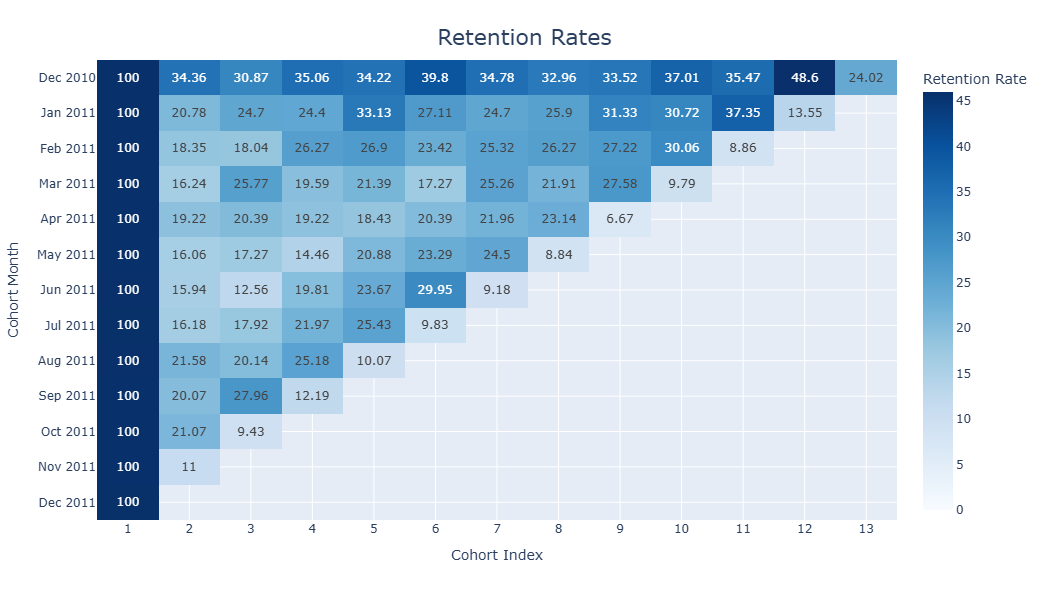

In [117]:

# Convert datetime index to "Jan 2011" format for y-axis labels
cohort_metrics.index = cohort_metrics.index.to_series().dt.strftime("%b %Y")

fig = px.imshow(
    cohort_metrics,
    text_auto=True,
    color_continuous_scale="Blues",
    zmin=0,
    zmax=46,
    aspect="auto",
    labels=dict(x="Cohort Index", y="Cohort Month", color="Retention Rate")
)

fig.update_layout(
    title_text="Retention Rates",
    title_font_size=22,
    title_x=0.5,
    title_y=0.95,
    height=600,
    width=1200
)

# Force x-axis to show all ticks
fig.update_xaxes(dtick=1)

fig.show()


**💡 Insight:**   
The cohort heatmap reveals a **typical retention decay curve** — strong customer retention in the first few months after acquisition, followed by a steady drop‑off over time.  

Key takeaways:  
- **Early retention is critical**: Across cohorts, the first 1–2 months after a customer’s initial purchase show the **highest retention rates**. This is the window where onboarding, engagement campaigns, and personalized offers have the most impact.  
- **Cohort quality varies**: Some acquisition months (e.g., earlier in the year) maintain **noticeably higher retention in later months**, hinting at either seasonal factors, campaign effectiveness, or customer quality differences at acquisition.  
- **Long‑term loyalty is rare**: By month 6–8 for most cohorts, retention drops sharply, with only a small proportion of customers staying active — signaling potential churn challenges.  
- **Opportunity for optimization**:  
  - Strengthen **post‑acquisition engagement** in the first 90 days to slow the drop‑off.  
  - Analyze **high‑performing cohorts** to replicate their acquisition channels, onboarding flows, or incentives.  
  - Consider **re‑activation triggers** at predictable churn points (e.g., 3 or 6 months after acquisition).  

In short, the data suggests that **who you acquire and how you engage them early on** greatly influences long‑term retention, and successful acquisition months provide a blueprint for scalable growth.

In [119]:
df.to_csv("D:\Customer Segmentation.csv")
rfm_data.to_csv("D:\RFM.csv")